In [1]:
import numpy as np

import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as t
from torch.utils.data import DataLoader

from torchsummary import summary

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
transformations = t.Compose([t.ToTensor(), t.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])

In [4]:
train_set = torchvision.datasets.STL10(root="data", download=True, split="train", transform=transformations)
test_set = torchvision.datasets.STL10(root="data", download=True, split="test", transform=transformations)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(test_set, batch_size=128)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
print(train_set.data.shape)
print(test_set.data.shape)
print(np.min(train_set.data), np.max(train_set.data))
print(train_set.classes)

(5000, 3, 96, 96)
(8000, 3, 96, 96)
0 255
['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']


In [6]:
x, y = next(iter(train_loader))

print(x.data.shape)
print(torch.min(x), torch.max(x))

torch.Size([32, 3, 96, 96])
tensor(-2.1179) tensor(2.6400)


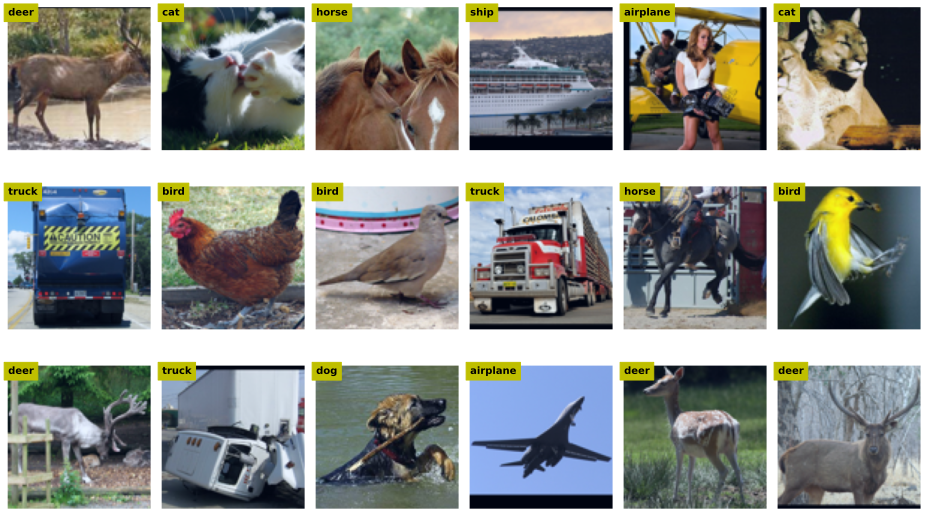

In [7]:
_, axis = plt.subplots(3, 6, figsize=(13, 8))

for i, ax in enumerate(axis.flatten()):
    pic = x.data[i].numpy().transpose((1, 2, 0))
    pic = pic - np.min(pic)
    pic = pic/np.max(pic)

    label = train_set.classes[y[i]]

    ax.imshow(pic)
    ax.text(0, 0, label, ha="left", va="top", fontweight="bold", color="k", backgroundcolor="y")
    ax.axis("off")

plt.tight_layout();

In [8]:
vgg_net = torchvision.models.vgg16(weights="DEFAULT")

In [9]:
vgg_net

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [10]:
summary(vgg_net, (3, 96, 96), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 96, 96]           1,792
              ReLU-2           [-1, 64, 96, 96]               0
            Conv2d-3           [-1, 64, 96, 96]          36,928
              ReLU-4           [-1, 64, 96, 96]               0
         MaxPool2d-5           [-1, 64, 48, 48]               0
            Conv2d-6          [-1, 128, 48, 48]          73,856
              ReLU-7          [-1, 128, 48, 48]               0
            Conv2d-8          [-1, 128, 48, 48]         147,584
              ReLU-9          [-1, 128, 48, 48]               0
        MaxPool2d-10          [-1, 128, 24, 24]               0
           Conv2d-11          [-1, 256, 24, 24]         295,168
             ReLU-12          [-1, 256, 24, 24]               0
           Conv2d-13          [-1, 256, 24, 24]         590,080
             ReLU-14          [-1, 256,

In [11]:
for p in vgg_net.parameters():
    p.requires_grad = False

In [12]:
vgg_net.classifier[6] = nn.Linear(4096, 10)

In [13]:
vgg_net

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [14]:
summary(vgg_net, (3, 96, 96), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 96, 96]           1,792
              ReLU-2           [-1, 64, 96, 96]               0
            Conv2d-3           [-1, 64, 96, 96]          36,928
              ReLU-4           [-1, 64, 96, 96]               0
         MaxPool2d-5           [-1, 64, 48, 48]               0
            Conv2d-6          [-1, 128, 48, 48]          73,856
              ReLU-7          [-1, 128, 48, 48]               0
            Conv2d-8          [-1, 128, 48, 48]         147,584
              ReLU-9          [-1, 128, 48, 48]               0
        MaxPool2d-10          [-1, 128, 24, 24]               0
           Conv2d-11          [-1, 256, 24, 24]         295,168
             ReLU-12          [-1, 256, 24, 24]               0
           Conv2d-13          [-1, 256, 24, 24]         590,080
             ReLU-14          [-1, 256,

In [15]:
vgg_net.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [16]:
loss_fun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(vgg_net.parameters(), lr=0.001, momentum=0.9)

In [17]:
num_epochs = 10

train_loss = []
test_loss = []
train_acc = []
test_acc = []

for epoch in range(num_epochs):

    vgg_net.train()
    batch_loss = []
    batch_acc = []

    for x, y in train_loader:
        x = x.to(device)
        y = y.to(device)

        y_hat = vgg_net(x)
        loss = loss_fun(y_hat, y)

        batch_loss.append(loss.item())

        y = y.cpu()
        y_hat = y_hat.cpu()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_acc.append(100 * torch.mean((torch.argmax(y_hat, axis=1) == y).float()).item())
        
        del x
        torch.cuda.empty_cache()

    train_loss.append(np.mean(batch_loss))
    train_acc.append(np.mean(batch_acc))

    vgg_net.eval()

    batch_loss = []
    batch_acc = []

    for x, y in test_loader:
        x = x.to(device)
        y = y.to(device)

        with torch.no_grad():
            y_hat = vgg_net(x)
            loss = loss_fun(y_hat, y)

        y = y.cpu()
        y_hat = y_hat.cpu()

        batch_loss.append(loss.item())

        batch_acc.append(100 * torch.mean((torch.argmax(y_hat, axis=1) == y).float()).item())

    test_loss.append(np.mean(batch_loss))
    test_acc.append(np.mean(batch_acc))

    print(f"Epoch {epoch+1}/{num_epochs}: Test Acc.: {test_acc[-1]:0.2f}, Test Loss: {test_loss[-1]:0.2f}, Train Acc.: {train_acc[-1]:0.2f}, Train Loss: {train_loss[-1]:0.2f}")
    del x
    torch.cuda.empty_cache()

Epoch 1/10: Test Acc.: 90.90, Test Loss: 0.27, Train Acc.: 82.95, Train Loss: 0.52
Epoch 2/10: Test Acc.: 91.20, Test Loss: 0.27, Train Acc.: 90.44, Train Loss: 0.29
Epoch 3/10: Test Acc.: 91.21, Test Loss: 0.27, Train Acc.: 91.85, Train Loss: 0.25
Epoch 4/10: Test Acc.: 91.38, Test Loss: 0.27, Train Acc.: 93.21, Train Loss: 0.21
Epoch 5/10: Test Acc.: 91.82, Test Loss: 0.26, Train Acc.: 93.77, Train Loss: 0.20
Epoch 6/10: Test Acc.: 91.65, Test Loss: 0.26, Train Acc.: 93.51, Train Loss: 0.20
Epoch 7/10: Test Acc.: 91.70, Test Loss: 0.26, Train Acc.: 94.17, Train Loss: 0.18
Epoch 8/10: Test Acc.: 91.39, Test Loss: 0.27, Train Acc.: 94.35, Train Loss: 0.17
Epoch 9/10: Test Acc.: 91.51, Test Loss: 0.26, Train Acc.: 94.81, Train Loss: 0.15
Epoch 10/10: Test Acc.: 91.44, Test Loss: 0.28, Train Acc.: 94.71, Train Loss: 0.15


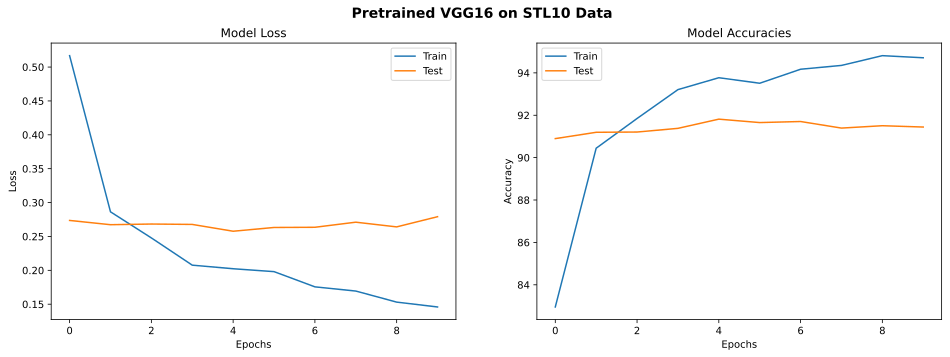

In [21]:
_, axis = plt.subplots(1, 2, figsize=(16, 5))

axis[0].plot(train_loss, "-", label="Train")
axis[0].plot(test_loss, "-", label="Test")
axis[0].set_xlabel("Epochs")
axis[0].set_ylabel("Loss")
axis[0].set_title("Model Loss")
axis[0].legend()

axis[1].plot(train_acc, "-", label="Train")
axis[1].plot(test_acc, "-", label="Test")
axis[1].set_xlabel("Epochs")
axis[1].set_ylabel("Accuracy")
axis[1].set_title("Model Accuracies")
axis[1].legend()

plt.suptitle("Pretrained VGG16 on STL10 Data", fontweight="bold", fontsize=14);

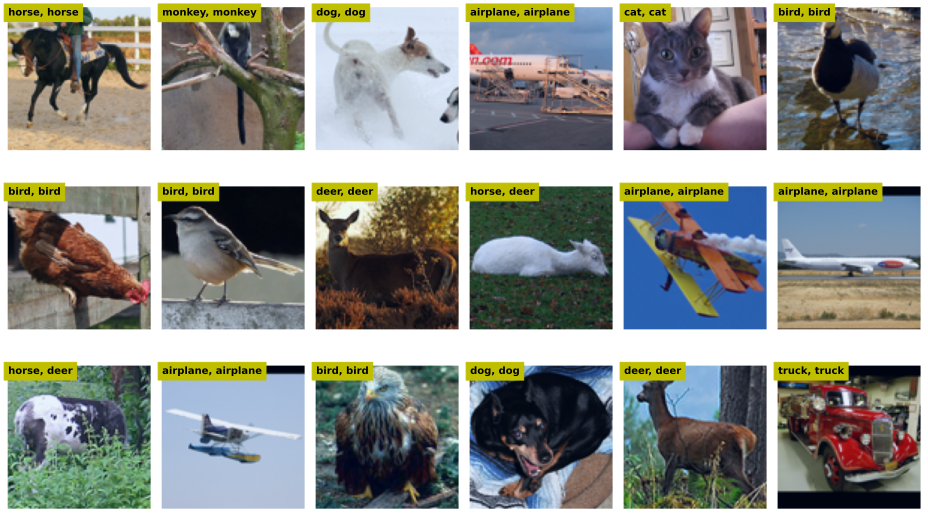

In [20]:
_, axis = plt.subplots(3, 6, figsize=(13, 8))

x, y = next(iter(test_loader))
vgg_net.to(device="cpu")
y_hat = vgg_net(x)

for i, ax in enumerate(axis.flatten()):
    pic = x.data[i].numpy().transpose((1, 2, 0))
    pic = pic - np.min(pic)
    pic = pic/np.max(pic)

    label_pred = train_set.classes[torch.argmax(y_hat, axis=1)[i]]
    label_real = train_set.classes[y[i]]

    ax.imshow(pic)
    ax.text(0, 0, f"{label_pred}, {label_real}", ha="left", va="top", fontweight="bold", color="k", backgroundcolor="y")
    ax.axis("off")

plt.tight_layout();